In [1]:
# Look at the distributions of non-anomalous and anomalous points
import numpy as np 
import matplotlib.pyplot as plt

from random_hyperplanes.planes import RandomProjectionForestOld
from random_hyperplanes.iforest import IsolationForest
from random_hyperplanes.projections import RandomProjectionForest

%matplotlib inline

In [2]:
# Parameters for each classifier
N_ESTIMATORS = 500
SCORE_AT = 95.0
def get_data():
    n = 1000
    contamination = 0.025
    n_anomalies = int(n * contamination)
    p = 2

    mean = np.array([0, 0])

    # The desired covariance matrix.
    cov = np.array([
        [1.0, -1.175],
        [-1.0, 1.250]
    ])

    cov_2 = np.array([
        [1.0, 1.175],
        [1.0, 1.250]
    ])

    cov_anon = np.array([
        [ 0.10, 0.0],
        [ 0.0, 0.10]
    ])

    offset = 50

    mean_anon = [ -2.5,  -2.5]
    mean_1 =    [ -1.0,   0.0]
    mean_2 =    [  1.0,   0.0]

    is_anomaly = np.random.choice(n, size=n_anomalies, replace=False)

    X = np.random.multivariate_normal(mean=mean_1,  cov=cov, size=(int(n/2),))
    X = np.row_stack([X, np.random.multivariate_normal(mean=mean_2, cov=cov_2, size=(int(n/2),))])
    X_anon = np.random.multivariate_normal(mean=mean_anon, cov=cov_anon, size=(is_anomaly.shape[0]))
    return (X, X_anon)

In [3]:
X, X_anon = get_data()
    
X_all = np.row_stack([X, X_anon])
np.random.shuffle(X_all)

print('Fitting estimators...')
rhp = RandomProjectionForestOld(n_estimators=N_ESTIMATORS).fit(X_all)
print(1)
rcf = IsolationForest(n_estimators=N_ESTIMATORS, method='rcf').fit(X_all)
print(2)
iforest = IsolationForest(n_estimators=N_ESTIMATORS, method='iforest').fit(X_all)
print(3)
new_rhp_rcf = RandomProjectionForest(n_estimators=N_ESTIMATORS, method='rcf').fit(X_all)
print(4)
new_rhp_iforest = RandomProjectionForest(n_estimators=N_ESTIMATORS, method='iforest').fit(X_all)
print('Done fitting!')

Fitting estimators...
1
2
3
4
Done fitting!


In [4]:
rcf_ano_depths = []
rcf_non_depths = []

rhp_ano_depths = []
rhp_non_depths = []

rhp_ano_rcf_depths = []
rhp_non_rcf_depths = []

rhp_ano_iforest_depths = []
rhp_non_iforest_depths = []

iforest_ano_depths = []
iforest_non_depths = []

ano_idx = np.random.randint(low=0, high=X_anon.shape[0])
non_idx = np.random.randint(low=0, high=X.shape[0])

ano_pt = np.array([X_anon[ano_idx, :]])
non_pt = np.array([X[non_idx, :]])

i = 0
print(f'Iteration 1')

for trees in zip(rcf.trees, rhp.trees, iforest.trees):
    i += 1
    if i % 50 == 0:
        print(f'Iteration {i}')
        
    rcf_tree, rhp_tree, if_tree = trees

    rcf_ano_depths.append(rcf_tree.decision_function(ano_pt))
    rcf_non_depths.append(rcf_tree.decision_function(non_pt))
    
    rhp_ano_depths.append(rhp_tree.get_depths(ano_pt))
    rhp_non_depths.append(rhp_tree.get_depths(non_pt))
    
    iforest_ano_depths.append(if_tree.decision_function(ano_pt))
    iforest_non_depths.append(if_tree.decision_function(non_pt))
    
    
    
rhp_ano_rcf_depths = new_rhp_rcf.get_depth_per_tree(ano_pt)
rhp_non_rcf_depths = new_rhp_rcf.get_depth_per_tree(non_pt)

rhp_ano_iforest_depths = new_rhp_iforest.get_depth_per_tree(ano_pt)
rhp_non_iforest_depths = new_rhp_iforest.get_depth_per_tree(non_pt)

Iteration 1
Iteration 50
Iteration 100
Iteration 150
Iteration 200
Iteration 250
Iteration 300
Iteration 350
Iteration 400
Iteration 450
Iteration 500


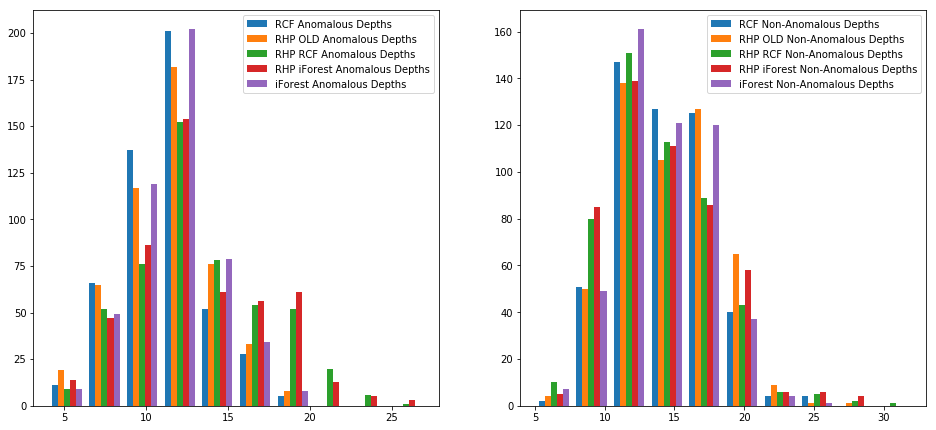

In [5]:
plt.figure(figsize=(16, 16))
plt.subplot(221)
plt.hist([rcf_ano_depths, 
          rhp_ano_depths,
          rhp_ano_rcf_depths,
          rhp_ano_iforest_depths,
          iforest_ano_depths])

plt.legend(['RCF Anomalous Depths', 
            'RHP OLD Anomalous Depths',
            'RHP RCF Anomalous Depths',
            'RHP iForest Anomalous Depths',
            'iForest Anomalous Depths',])

plt.subplot(222)
plt.hist([rcf_non_depths, 
          rhp_non_depths,
          rhp_non_rcf_depths,
          rhp_non_iforest_depths,
          iforest_non_depths])

plt.legend(['RCF Non-Anomalous Depths', 
            'RHP OLD Non-Anomalous Depths',
            'RHP RCF Non-Anomalous Depths',
            'RHP iForest Non-Anomalous Depths',
            'iForest Non-Anomalous Depths',])
plt.show()